4209550 attttt
{'code': 200, 'message': 'Exercise Retrieved', 'exercise': {'test_id': 80455, 'section_id': 237467, 'exercise_id': 74556, 'exercise_name': 'Scholarship Test', 'test_parts': [{'test_part_id': 95673, 'questions': [{'question_id': 1291947, 'user_answers': [{'answer': ['2'], 'user_question_time': 179}], 'user_question_time': 179, 'difficulty': 2, 'markedInputs': [{'correct': 0, 'marks': 0, 'is_attempted': 1, 'exp': 0, 'isFinalized': 1}], 'question_JSON': '["\\n"]', 'input_JSON': '[{"input_type":0,"question_string":"<b>Dopamine 200 mg in 500 mL of normal saline at 5 &mu;g\\/kg\\/min is ordered for a 70 kg patient. At what rate (mL\\/min) should the solution be infused to deliver the desired dose of 5 &mu;g\\/kg\\/min?<\\/b>\\n","options":[{"index":0,"option_string":"<p>0.35<\\/p>\\n"},{"index":1,"option_string":"<p>0.40<\\/p>\\n"},{"index":2,"option_string":"<p>0.88<\\/p>\\n"},{"index":3,"option_string":"<p>2.0<\\/p>\\n"},{"index":4,"option_string":"<p>5.0<\\/p>\\n"}],"marks"

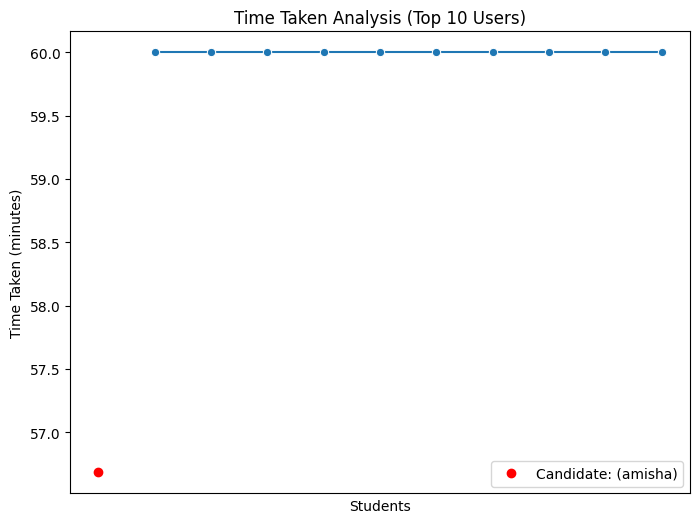

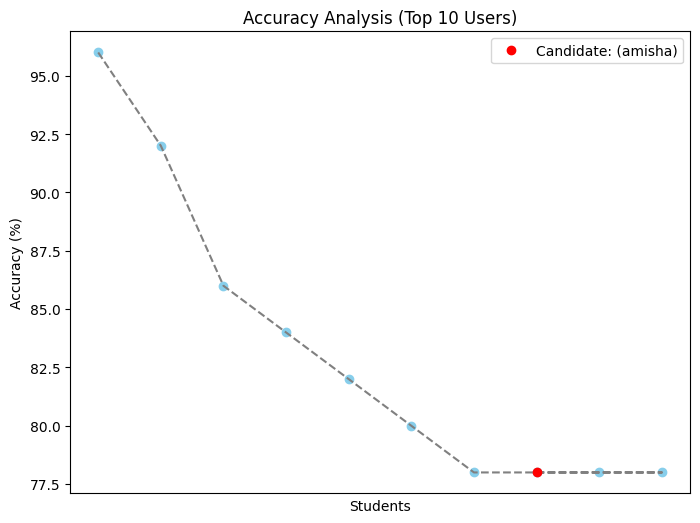

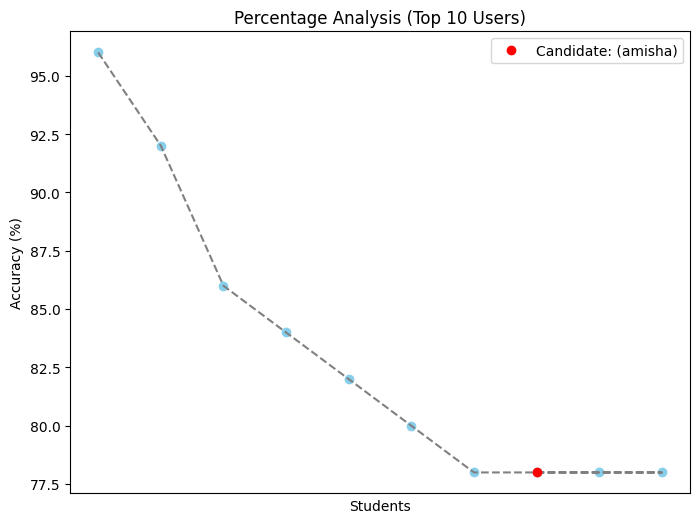

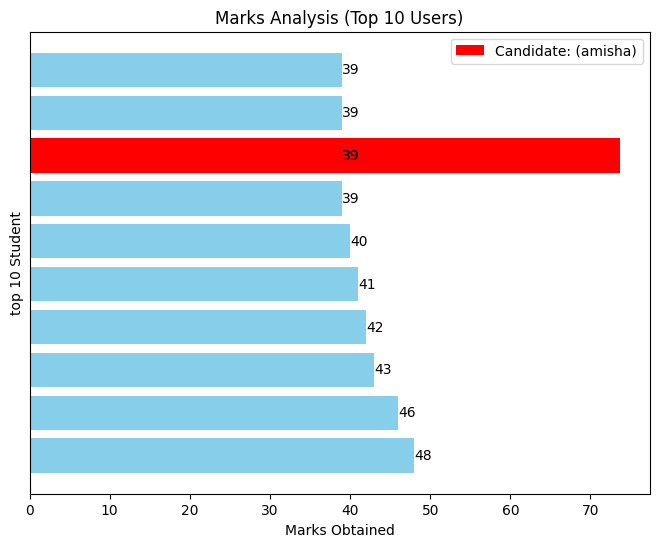

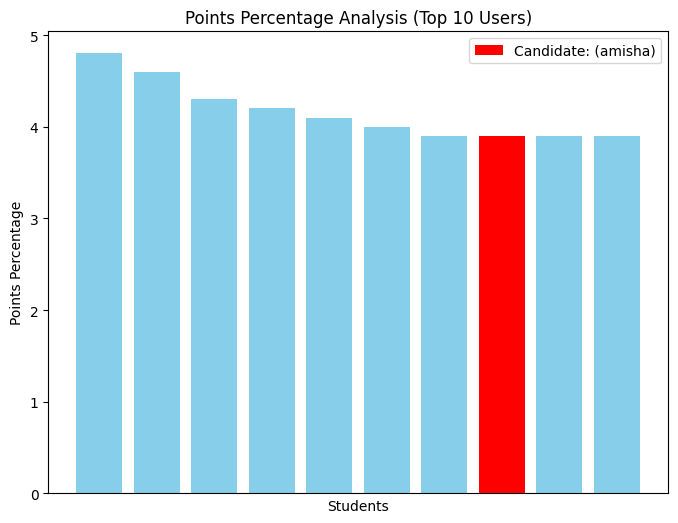

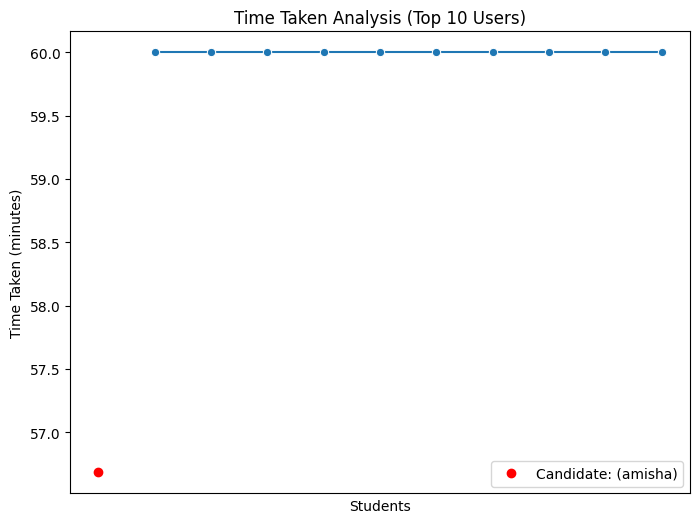

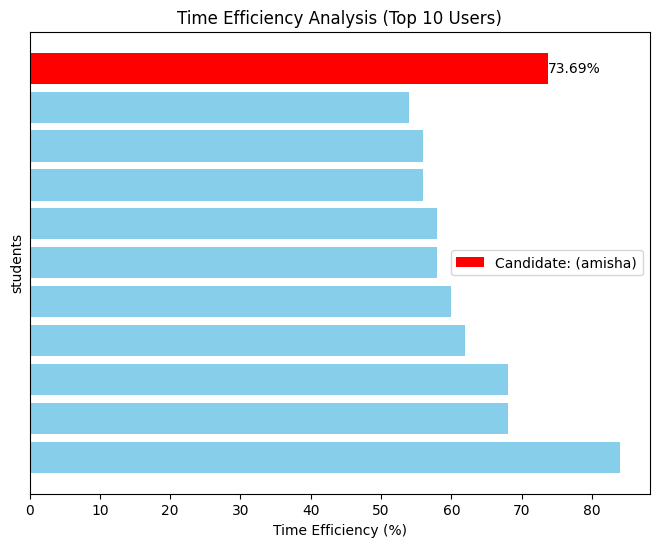

In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
headers = {
    "apiKey": "e63cb1851964c2aea0c3a1836cdd4b98",
    "ORGID": "5735"
}

# Attempt jSON
# file_path = 'C:\\Users\Admin\Desktop\\AI Report Academically\\attemptData.json'  

student_id = 90547962
url = f'http://lms.academically.com/nuSource/api/v1//exercises/74556/attemptlist?class_id=238659&user_id={student_id}&is_quiz=false'

# Attempt API API call to get the attempt ID
response = requests.get(url, headers=headers)
if response.status_code == 200:
    data = response.json()
    if data['code'] == 200 and data['message'] == 'Exercise Retrieved':
        attempt_id = data['exercises'][0]['attempt_id']
        print(attempt_id,"attttt")
        # Second API call using the attempt ID
        url2 = f'http://lms.academically.com/nuSource/api/v1//exercises/pasttest/{attempt_id}'
        response2 = requests.get(url2, headers=headers)
        
        # Store the response in a variable
        exercise_data = response2.json()
        print(exercise_data)
    else:
        print("Failed to retrieve exercises")
else:
    print("Failed to connect to API")

# Read the JSON data from the file
# with open(file_path, 'r') as file:
#     json_data = file.read()

# Parse the JSON data
# data = json.loads(json_data)

# Get the questions array
questions = exercise_data['exercise']['test_parts'][0]['questions']

# Initialize an array to store marks
marks_array = [0] * 50
time_taken_array = [0] * 50

# Iterate through each question
for i in range(50):
    if i < len(questions):
        question = questions[i]
        if 'markedInputs' in question:
            marked_input = question['markedInputs'][0]
            if 'is_attempted' in marked_input:
                if marked_input['is_attempted'] == 1:
                    if 'correct' in marked_input:
                        if marked_input['correct'] == 1:
                            marks_array[i] = 1  # Correct answer
                        else:
                            marks_array[i] = 0  # Incorrect answer
                else:
                    marks_array[i] = 2  # Question not attempted

        # Extract time taken per question
        if 'user_question_time' in question:
            time_taken_array[i] = question['user_question_time']

print(marks_array)
print(time_taken_array)
pharmaceutical_chemistry_marks = marks_array[:10]
pharmacology_marks = marks_array[10:25]
physiology_marks = marks_array[25:40]
pharmaceutics_and_therapeutics_marks = marks_array[40:]

# time array
pharmaceutical_chemistry_time = time_taken_array[:10]
pharmacology_time = time_taken_array[10:25]
physiology_time = time_taken_array[25:40]
pharmaceutics_and_therapeutics_time = time_taken_array[40:]

# Print the time taken for each topic
print("Pharmaceutical Chemistry Time:", pharmaceutical_chemistry_time)
print("Pharmacology Time:", pharmacology_time)
print("Physiology Time:", physiology_time)
print("Pharmaceutics and Therapeutics Time:", pharmaceutics_and_therapeutics_time)

# Print the marks for each topic
print("Pharmaceutical Chemistry Marks:", pharmaceutical_chemistry_marks)
print("Pharmacology Marks:", pharmacology_marks)
print("Physiology Marks:", physiology_marks)
print("Pharmaceutics and Therapeutics Marks:", pharmaceutics_and_therapeutics_marks)


# Student wise complete data top 10 comparison
# Load JSON data
# with open('C:\\Users\Admin\\Desktop\\AI Report Academically\\studetails.json') as f:
    # data = json.load(f)

import requests

# API endpoint
url = "http://lms.academically.com/nuSource/api/v1/reports/classprogress"
params = {
    "class_id": 238659,
    "page": 1,
    "per_page": 2000
}

# Headers with apiKey and ORGID


# Send a GET request
response = requests.get(url, params=params, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the response data in a variable
    # parsed_data = json.loads(data)
    parsed_data = response.json()
    print("Data fetched successfully:")
    users_array_size = len(parsed_data['class_report']['user_marks'])

    print("Size of the users array:", users_array_size)
    print(data)
else:
    print("Failed to fetch data. Status code:", response.status_code)
    print("Response message:", response.text)  # This will help you understand what went wrong


# Extract user data
users_data = parsed_data['class_report']['users']

# Extract user marks data
user_marks_data = parsed_data['class_report']['user_marks']

# Studen id here
given_student_id = 90547962




# Define the API key and Organization ID in headers
# headers = {
#     'apiKey': '90699a1504e98ba0996a9ca1191c2a12',
#     'ORGID': '5735'
# }






# Rank of a user

def rank_students():
    marks_dict = {}  # Dictionary to store students based on their marks
    for student_id in users_df['student_id']:
        marks = marks_analysis(student_id)
        if marks not in marks_dict:
            marks_dict[marks] = []
        marks_dict[marks].append(student_id)

    # Sort the dictionary keys in descending order
    sorted_marks = sorted(marks_dict.keys(), reverse=True)

    ranked_students = []  # List to store (student_id, rank) tuples

    rank = 1
    for marks in sorted_marks:
        student_ids = marks_dict[marks]
        for student_id in student_ids:
            ranked_students.append((student_id, rank))
        rank += len(student_ids)
    print("Length of marks_dict:", len(marks_dict))
    return ranked_students

def find_student_rank(student_id):
    ranked_students = rank_students()
    for student, rank in ranked_students:
        if student == student_id:
            return rank
    return None  # Student ID not found in ranked list


# Average scores

def average_marks():
    marks_list = [marks_analysis(student_id) for student_id in users_df['student_id']]
    return round(sum(marks_list) / len(marks_list), 2)

def average_time_taken():
    time_list = [time_taken_analysis(student_id) for student_id in users_df['student_id']]
    return round(sum(time_list) / len(time_list), 2)

def average_accuracy():
    accuracy_list = [accuracy_analysis(student_id) for student_id in users_df['student_id']]
    return round(sum(accuracy_list) / len(accuracy_list), 2)

def average_percent():
    accuracy_list = [percent_analysis(student_id) for student_id in users_df['student_id']]
    return round(sum(accuracy_list) / len(accuracy_list), 2)

def average_time_efficiency():
    time_efficiency_list = [time_efficiency(student_id) for student_id in users_df['student_id'] if time_efficiency(student_id) is not None]
    if len(time_efficiency_list) == 0:
        return None  # or return 0 or any other value as appropriate
    else:
        return round(sum(time_efficiency_list) / len(time_efficiency_list), 2)

# Create a DataFrame for user data
users_df = pd.DataFrame(users_data, columns=['student_id', 'student_name', 'student_username'])

# Define a function to extract marks data for a given student
def extract_marks(student_id):
    marks_data = user_marks_data[str(student_id)]
    return marks_data

# Define a function to get student name by ID
def get_student_name(student_id):
    for user in users_data:
        if user[0] == student_id:
            return user[1]
    return None


def rank_students():
    marks_dict = {}  # Dictionary to store students based on their marks
    for student_id in users_df['student_id']:
        marks = marks_analysis(student_id)
        if marks not in marks_dict:
            marks_dict[marks] = []
        marks_dict[marks].append(student_id)

    # Sort the dictionary keys in descending order
    sorted_marks = sorted(marks_dict.keys(), reverse=True)

    ranked_students = []  # List to store (student_id, rank) tuples

    rank = 1
    for marks in sorted_marks:
        student_ids = marks_dict[marks]
        for student_id in student_ids:
            ranked_students.append((student_id, rank))
        rank += len(student_ids)
    print("Length of marks_dict:", len(marks_dict))
    return ranked_students

def find_student_rank(student_id):
    ranked_students = rank_students()
    for student, rank in ranked_students:
        if student == student_id:
            return rank
    return None  # Student ID not found in ranked list


# Define a function to sort users based on maximum marks
def sort_users_by_max_marks():
    marks_dict = {}
    for user in users_data:
        marks_data = extract_marks(user[0])
        marks_dict[user[0]] = int(marks_data[0]['mk'])
    sorted_users = sorted(marks_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    sorted_user_ids = [user[0] for user in sorted_users]
    return sorted_user_ids

# Define functions to get performance metrics for a given student ID
def percent_analysis(student_id):
    marks_data = extract_marks(student_id)
    accuracy = (int(marks_data[0]['mk'])*100)/50 #change marks here
    return accuracy


def accuracy_analysis(student_id):
    marks_data = extract_marks(student_id)
    accuracy = int(marks_data[0]['gr'])
    return accuracy

def marks_analysis(student_id):
    marks_data = extract_marks(student_id)
    marks = int(marks_data[0]['mk'])
    return marks

# Define a function to analyze marks for a given student
def marks_analysis2(student_id):
    marks_data = extract_marks(student_id)
    if marks_data:
        attempt = marks_data[0]
        marks = int(attempt.get("mk"))
        total_marks = int(attempt.get("tm"))
        return marks, total_marks
    return None


def points_percentage_analysis(student_id):
    marks_data = extract_marks(student_id)
    points_percentage = float(marks_data[0]['pt'])
    return points_percentage

def time_taken_analysis(student_id):
    marks_data = extract_marks(student_id)
    time_taken_seconds = int(marks_data[0]['tttm'])
    time_taken_minutes = time_taken_seconds / 60  # Convert seconds to minutes
    return time_taken_minutes

def sort_users_by_time_taken():
    time_dict = {}
    for user in users_data:
        time_data = time_taken_analysis(user[0])
        time_dict[user[0]] = time_data
    sorted_users = sorted(time_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    sorted_user_ids = [user[0] for user in sorted_users]
    return sorted_user_ids


# Define a function to visualize time taken for top users using seaborn

from matplotlib.figure import Figure

def visualize_time_taken_top_users():
    sorted_user_ids = sort_users_by_time_taken()
    time_data = {get_student_name(student_id): time_taken_analysis(student_id) for student_id in sorted_user_ids}
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # Get the reversed list of data points
    reversed_data = list(time_data.values())[::-1]
    reversed_names = list(time_data.keys())[::-1]
    
    # Plot for given student
    ax.plot([get_student_name(given_student_id)], [time_taken_analysis(given_student_id)], 'ro', label=f'Candidate: ({get_student_name(given_student_id)})')
    
    sns.lineplot(ax=ax, x=reversed_names, y=reversed_data, marker='o')
    
    ax.set_title('Time Taken Analysis (Top 10 Users)')
    ax.set_xlabel('Students')
    ax.set_ylabel('Time Taken (minutes)')
    ax.set_xticks(range(len(time_data)))  # Set tick positions
    # ax.set_xticklabels(reversed_names, rotation=45)
    ax.set_xticks([])
    ax.legend()
    return fig

# Call the function to get the figure object
time_taken_fig = visualize_time_taken_top_users()
# plt.show()




# Define a function to sort users by time taken



# Define a function to calculate time efficiency
def time_efficiency(student_id):
    marks_data = marks_analysis2(student_id)
    if marks_data is None:
        return None
    marks, total_marks = marks_data
    if total_marks == 0:
        return None  # or return 0 or any other value as appropriate
    time_taken_hours = time_taken_analysis(student_id) / 60
    efficiency = (marks / total_marks) * (time_taken_hours) * 100
    return efficiency



def visualize_time_efficiency_top_users():
    sorted_user_ids = sort_users_by_time_taken()
    efficiency_data = {get_student_name(student_id): time_efficiency(student_id) for student_id in sorted_user_ids}
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    sorted_names = list(efficiency_data.keys())
    sorted_values = list(efficiency_data.values())
    ax.barh(sorted_names, sorted_values, color='skyblue')
    # Plot for given student
    given_student_name = get_student_name(given_student_id)
    given_student_efficiency = time_efficiency(given_student_id)
    ax.barh([given_student_name], [given_student_efficiency], color='red', label=f'Candidate: ({given_student_name})')
    ax.text(given_student_efficiency, given_student_name, f'{given_student_efficiency:.2f}%', color='black', va='center', ha='left')  # Write value inside the bar
    ax.set_title('Time Efficiency Analysis (Top 10 Users)')
    ax.set_xlabel('Time Efficiency (%)')
    ax.set_ylabel('students')
    ax.legend()
    ax.set_yticks([])
    return fig

def visualize_points_percentage_top_users():
    sorted_user_ids = sort_users_by_max_marks()
    points_data = {get_student_name(student_id): points_percentage_analysis(student_id) for student_id in sorted_user_ids}
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    for student_id in sorted_user_ids:
        student_name = get_student_name(student_id)
        ax.bar([student_name], [points_data[student_name]], color='skyblue')
    # Plot for given student
    ax.bar([get_student_name(given_student_id)], [points_percentage_analysis(given_student_id)], color='red', label=f'Candidate: ({get_student_name(given_student_id)})')
    ax.set_title('Points Percentage Analysis (Top 10 Users)')
    ax.set_xlabel('Students')
    ax.set_ylabel('Points Percentage')
    ax.set_xticks([])
    ax.legend()
    return fig

def visualize_marks_top_users():
    sorted_user_ids = sort_users_by_max_marks()
    marks_data = {get_student_name(student_id): marks_analysis(student_id) for student_id in sorted_user_ids}
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    sorted_names = list(marks_data.keys())
    sorted_values = list(marks_data.values())
    ax.barh(sorted_names, sorted_values, color='skyblue')
    # Write values on the side of bars
    for index, (name, value) in enumerate(zip(sorted_names, sorted_values)):
        ax.text(value, index, str(value), va='center')  # Write value inside the bar
    # Plot for given student
    given_student_name = get_student_name(given_student_id)
    given_student_marks = marks_analysis(given_student_id)
    ax.barh([given_student_name], [time_efficiency(given_student_id)], color='red', label=f'Candidate: ({given_student_name})')
    ax.text(given_student_marks, given_student_name, str(given_student_marks), color='black', va='center')  # Write value inside the bar
    ax.set_title('Marks Analysis (Top 10 Users)')
    ax.set_xlabel('Marks Obtained')
    ax.set_ylabel('top 10 Student')
    ax.legend()
    ax.set_yticks([])
    return fig


import matplotlib.pyplot as plt
import seaborn as sns

def visualize_accuracy_top_users():
    sorted_user_ids = sort_users_by_max_marks()
    accuracy_data = {get_student_name(student_id): accuracy_analysis(student_id) for student_id in sorted_user_ids}
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # Plot data points
    for student_id in sorted_user_ids:
        student_name = get_student_name(student_id)
        ax.plot([student_name], [accuracy_data[student_name]], marker='o', color='skyblue')

    # Include the given student's data point in the list
    sorted_names = [get_student_name(student_id) for student_id in sorted_user_ids]
    sorted_values = [accuracy_data[name] for name in sorted_names]
    sorted_names.append(get_student_name(given_student_id))  # Add given student's name
    sorted_values.append(accuracy_analysis(given_student_id))  # Add given student's data
    ax.plot(sorted_names, sorted_values, linestyle='--', color='grey')  # Dotted line, grey color

    # Plot for given student
    ax.plot([get_student_name(given_student_id)], [accuracy_analysis(given_student_id)], 'ro', label=f'Candidate: ({get_student_name(given_student_id)})')

    ax.set_title('Accuracy Analysis (Top 10 Users)')
    ax.set_xlabel('Students')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xticks([])
    ax.legend()
    return fig


def visualize_percent_top_users():
    sorted_user_ids = sort_users_by_max_marks()
    accuracy_data = {get_student_name(student_id): percent_analysis(student_id) for student_id in sorted_user_ids}
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # Plot data points
    for student_id in sorted_user_ids:
        student_name = get_student_name(student_id)
        ax.plot([student_name], [accuracy_data[student_name]], marker='o', color='skyblue')

    # Include the given student's data point in the list
    sorted_names = [get_student_name(student_id) for student_id in sorted_user_ids]
    sorted_values = [accuracy_data[name] for name in sorted_names]
    sorted_names.append(get_student_name(given_student_id))  # Add given student's name
    sorted_values.append(percent_analysis(given_student_id))  # Add given student's data
    ax.plot(sorted_names, sorted_values, linestyle='--', color='grey')  # Dotted line, grey color

    # Plot for given student
    ax.plot([get_student_name(given_student_id)], [percent_analysis(given_student_id)], 'ro', label=f'Candidate: ({get_student_name(given_student_id)})')

    ax.set_title('Percentage Analysis (Top 10 Users)')
    ax.set_xlabel('Students')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xticks([])
    ax.legend()
    return fig


# Define a function to visualize performance for a given student ID
def visualize_student_performance(student_id):
    student_name = get_student_name(student_id)
    print("Overall Summary for Student", student_id, ":", student_name)
    print("Accuracy:", accuracy_analysis(student_id))
    print("Marks:", marks_analysis(student_id))
    print("Points Percentage:", points_percentage_analysis(student_id))
    print("Time Taken (minutes):", time_taken_analysis(student_id))
    visualize_accuracy_top_users()
    visualize_percent_top_users()
    visualize_marks_top_users()
    visualize_points_percentage_top_users()
    visualize_time_taken_top_users()
    visualize_time_efficiency_top_users()
    # Plot performance for the given student ID
    # plt.figure(figsize=(10, 6))
    # plt.plot(['Accuracy'], [accuracy_analysis(student_id)], marker='o', label='Accuracy')
    # plt.plot(['Marks'], [marks_analysis(student_id)], marker='o', label='Marks')
    # plt.plot(['Points Percentage'], [points_percentage_analysis(student_id)], marker='o', label='Points Percentage')
    # plt.plot(['Time Taken'], [time_taken_analysis(student_id)], marker='o', label='Time Taken (minutes)')
    # plt.title('Performance Analysis for Student ID: ' + str(student_id))
    # plt.xlabel('Metrics')
    # plt.ylabel('Values')
    # plt.legend()
    # plt.xticks(rotation=45)

# Call the function to visualize performance for the given student ID
visualize_student_performance(given_student_id)



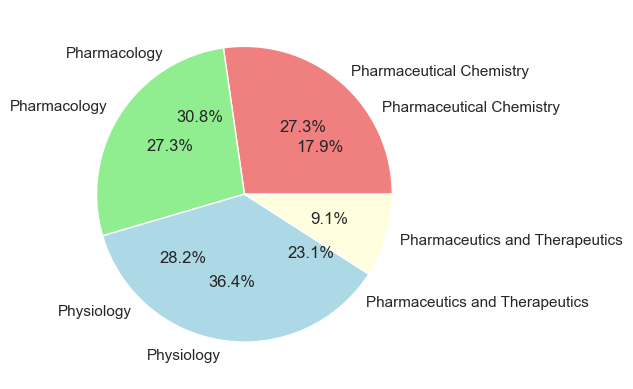

In [3]:
import json

# Path to your JSON file


import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.backends.backend_pdf import PdfPages
import math
import seaborn as sns
import numpy as np
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Function to calculate the sum of marks for correct answers
def calculate_sum_marks(marks):
    return sum(mark for mark in marks if mark == 1)

# Calculate sum of marks for each topic
sum_marks_pharmaceutical_chemistry = calculate_sum_marks(pharmaceutical_chemistry_marks)
sum_marks_pharmacology = calculate_sum_marks(pharmacology_marks)
sum_marks_physiology = calculate_sum_marks(physiology_marks)
sum_marks_pharmaceutics_and_therapeutics = calculate_sum_marks(pharmaceutics_and_therapeutics_marks)

# Bar chart for sum of marks per topic
topics = ['Pharmaceutical Chemistry', 'Pharmacology', 'Physiology', 'Pharmaceutics and Therapeutics']
sum_marks = [sum_marks_pharmaceutical_chemistry, sum_marks_pharmacology, sum_marks_physiology, sum_marks_pharmaceutics_and_therapeutics]

# plt.figure(figsize=(10, 6))
# plt.bar(topics, sum_marks, color='skyblue')
# plt.title('Sum of Marks for Correct Answers per Topic')
# plt.xlabel('Topics')
# plt.ylabel('Sum of Marks')
# plt.xticks(rotation=45)
# plt.show()

# Pie chart for percentage of correct, incorrect, and unattempted questions per topic
correct_counts = [pharmaceutical_chemistry_marks.count(1), pharmacology_marks.count(1),
                  physiology_marks.count(1), pharmaceutics_and_therapeutics_marks.count(1)]
incorrect_counts = [pharmaceutical_chemistry_marks.count(0), pharmacology_marks.count(0),
                    physiology_marks.count(0), pharmaceutics_and_therapeutics_marks.count(0)]
unattempted_counts = [pharmaceutical_chemistry_marks.count(2), pharmacology_marks.count(2),
                      physiology_marks.count(2), pharmaceutics_and_therapeutics_marks.count(2)]

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
plt.pie(correct_counts, labels=topics, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue', 'lightyellow'])
# plt.title('Percentage of Correct Answers')

# plt.subplot(1, 2, 2)
plt.pie(incorrect_counts, labels=topics, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'])
# plt.title('Percentage of Incorrect Answers')

# plt.show()

topic_marks = [pharmaceutical_chemistry_marks, pharmacology_marks, physiology_marks, pharmaceutics_and_therapeutics_marks]


# Calculate total marks for each topic based on correct answers (array element is 1)
total_marks_topicwise = [sum(1 for mark in topic_marks if mark == 1) for topic_marks in [pharmaceutical_chemistry_marks, pharmacology_marks,
                                                                                       physiology_marks, pharmaceutics_and_therapeutics_marks]]

# Plot Topic-wise Total Marks
# plt.figure(figsize=(7, 6))
# plt.bar(topics, total_marks_topicwise, color='skyblue', width=0.5)
# plt.title('Topic-wise Total Marks (Correct Answers)')
# plt.xlabel('Topics')
# plt.ylabel('Total Correct Answers')
# plt.xticks(rotation=0, ha='center', fontsize=8)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


# Calculate average time taken for each topic
average_time_taken_a = [np.mean(pharmaceutical_chemistry_time), np.mean(pharmacology_time),
                      np.mean(physiology_time), np.mean(pharmaceutics_and_therapeutics_time)]

# Plot Topic-wise Average Time Taken
# plt.figure(figsize=(7, 6))
# plt.bar(topics, average_time_taken_a, color='lightgreen', width=0.5)
# plt.title('Topic-wise Average Time Taken per question')
# plt.xlabel('Topics')
# plt.ylabel('Average Time Taken (seconds)')
# plt.xticks(rotation=0, ha='center', fontsize=8)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Calculate percentages of correct, incorrect, and unattempted questions
total_questions = len(marks_array)
percent_correct = (marks_array.count(1) / total_questions) * 100
percent_incorrect = (marks_array.count(0) / total_questions) * 100
percent_unattempted = (marks_array.count(2) / total_questions) * 100

# Plot Pie Chart for Percentage Correct, Incorrect, and Unattempted
total_questions = len(marks_array)
percent_correct = (marks_array.count(1) / total_questions) * 100
percent_incorrect = (marks_array.count(0) / total_questions) * 100
percent_unattempted = (marks_array.count(2) / total_questions) * 100

# Plot Pie Chart for Percentage Correct, Incorrect, and Unattempted
# labels = ['Correct', 'Incorrect', 'Unattempted']
sizes = [percent_correct, percent_incorrect, percent_unattempted]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# plt.figure(figsize=(4, 4))
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# plt.title('Percentage of Correct, Incorrect, and Unattempted Questions')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()

# Calculate total time taken per section
total_time_pharmaceutical_chemistry = sum(pharmaceutical_chemistry_time)/60
total_time_pharmacology = sum(pharmacology_time)/60
total_time_physiology = sum(physiology_time)/60
total_time_pharmaceutics_and_therapeutics = sum(pharmaceutics_and_therapeutics_time)/60

# Define section names
sections = ['Pharmaceutical Chemistry', 'Pharmacology', 'Physiology', 'Pharmaceutics and Therapeutics']
total_times = [total_time_pharmaceutical_chemistry, total_time_pharmacology, total_time_physiology, total_time_pharmaceutics_and_therapeutics]

# Plot total time taken per section with inverted bars
# plt.figure(figsize=(8,6))
# plt.barh(sections, total_times, color='skyblue',height=0.5)
# plt.title('Total Time Taken per Section')
# plt.xlabel('Total Time Taken (minutes)')
# plt.ylabel('Sections')
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout(pad=2)
# plt.show()


# Calculate the percentage of correct answers for each topic
total_questions_per_topic = [len(topic_marks) for topic_marks in [pharmaceutical_chemistry_marks, pharmacology_marks, physiology_marks, pharmaceutics_and_therapeutics_marks]]
total_correct_per_topic = [sum(1 for mark in topic_marks if mark == 1) for topic_marks in [pharmaceutical_chemistry_marks, pharmacology_marks, physiology_marks, pharmaceutics_and_therapeutics_marks]]
percentage_correct_topicwise = [(correct / total_questions) * 100 for correct, total_questions in zip(total_correct_per_topic, total_questions_per_topic)]

# Plot Percentage of Correct Answers Topic-wise
# plt.figure(figsize=(7, 6))
# bars = plt.bar(topics, percentage_correct_topicwise, color='orange',width=0.5)
# plt.title('Percentage of Correct Answers Topic-wise')
# plt.xlabel('Topics')
# plt.ylabel('Percentage of Correct Answers')


def percentage_formatter(x, pos):
    return '{:.0f}%'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))


# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height + 1, '', ha='center', va='bottom')

# plt.xticks(rotation=0, ha='center', fontsize=8)
# for tick in plt.gca().get_xticklabels():
#     words = tick.get_text().split()  # Split label text into words
#     if len(words) > 1:
#         tick.set_linespacing(1)  # Adjust spacing between lines
#         tick.set_text('\n'.join(words))  # Set label text with newline character

# plt.ylim(0, 100)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


# Percentage
total_questions_per_topic = [len(topic_marks) for topic_marks in [pharmaceutical_chemistry_marks, pharmacology_marks, physiology_marks, pharmaceutics_and_therapeutics_marks]]
total_correct_per_topic = [sum(1 for mark in topic_marks if mark == 1) for topic_marks in [pharmaceutical_chemistry_marks, pharmacology_marks, physiology_marks, pharmaceutics_and_therapeutics_marks]]
percentage_correct_topicwise = [(correct / total_questions) * 100 for correct, total_questions in zip(total_correct_per_topic, total_questions_per_topic)]

# Calculate percentage of incorrect answers for each topic
total_incorrect_per_topic = [sum(1 for mark in topic_marks if mark == 0) for topic_marks in [pharmaceutical_chemistry_marks, pharmacology_marks, physiology_marks, pharmaceutics_and_therapeutics_marks]]
percentage_incorrect_topicwise = [(incorrect / total_questions) * 100 for incorrect, total_questions in zip(total_incorrect_per_topic, total_questions_per_topic)]

# Plot Percentage of Correct and Incorrect Answers Topic-wise
# plt.figure(figsize=(7, 6))
bar_width = 0.35
topics_bar = np.arange(len(topics))
# bars1 = plt.bar(topics_bar - bar_width/2, percentage_correct_topicwise, bar_width, color='orange', label='Correct')
# bars2 = plt.bar(topics_bar + bar_width/2, percentage_incorrect_topicwise, bar_width, color='lightcoral', label='Incorrect')
# plt.title('Percentage of Correct Vs Incorrect Answers Topic-wise')
# plt.xlabel('Topics')
# plt.ylabel('Percentage of Answers')
# plt.xticks(topics_bar, topics, rotation=0, ha='center', fontsize=8)

# # Function to format y-axis labels with '%'
# def percentage_formatter(x, pos):
#     return '{:.0f}%'.format(x)

# plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# plt.legend()
# plt.ylim(0, 100)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()



# Create a PDF file to save the plots
with PdfPages('graphs_summary.pdf') as pdf:

# Function to split label into two lines after a whitespace
    def split_label(label):
        index = label.rfind(' ')
        if index != -1:
            return label[:index] + '\n' + label[index+1:]
        else:
            return label

    plt.figure(figsize=(7, 6))
    plt.bar(topics, total_marks_topicwise, color='skyblue', width=0.5)
    plt.title('Topic-wise Total Marks (Correct Answers)')
    plt.xlabel('Topics')
    plt.ylabel('Total Correct Answers')

    # Split x-tick labels into two lines after a whitespace
    xtick_labels = [split_label(label) for label in topics]

    # Set x-tick labels with margin on the right
    plt.xticks(range(len(topics)), xtick_labels, rotation=0, ha='center', fontsize=8)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=3.5)  # Add padding/margins around the plot
    summary = "This graph indicates the total number of correct answers for each topic."
    plt.figtext(0.5, 0.06, summary, wrap=True, ha='center', fontsize=8)
    pdf.savefig(pad_inches=(20, 20, 20, 20))  # Adjust page size here
    plt.close()




# Function to split label into two lines after a whitespace
    def split_label(label):
        index = label.rfind(' ')
        if index != -1:
            return label[:index] + '\n' + label[index+1:]
        else:
            return label

    plt.figure(figsize=(7, 6))
    plt.bar(topics, average_time_taken_a, color='lightgreen', width=0.5)
    plt.title('Topic-wise Average Time Taken per question')
    plt.xlabel('Topics')
    plt.ylabel('Average Time Taken (seconds)')

    # Split x-tick labels into two lines after a whitespace
    xtick_labels = [split_label(label) for label in topics]

    # Set x-tick labels with margin on the right
    plt.xticks(range(len(topics)), xtick_labels, rotation=0, ha='center', fontsize=8)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=3.5)  # Add padding/margins around the plot
    summary = "This graph indicates the average time taken per question for each topic."
    plt.figtext(0.5, 0.06, summary, wrap=True, ha='center', fontsize=8)
    pdf.savefig(pad_inches=(20, 20, 20, 20))  # Adjust page size here
    plt.close()


    # Plot Pie Chart for Percentage Correct, Incorrect, and Unattempted Questions
    plt.figure(figsize=(6, 6))  # Keep figure size for better readability
    plt.pie(sizes,  colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Question Response Analysis', fontsize=12, pad=20)  # Adjust the padding and font size of the title
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.legend(loc='upper right', labels=['Correct', 'Incorrect', 'Unattempted'], fontsize=8)  
    plt.xlabel('Response Categories', fontsize=10)  # Add x-axis label
    summary = "This pie chart shows the distribution of correct, incorrect, and unattempted questions."
    plt.figtext(0.5, 0.01, summary, wrap=True, ha='center', fontsize=10)  # Adjust the position and font size of the summary
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust padding around the plot
    pdf.savefig(bbox_inches='tight', pad_inches=0.5)  # Save the figure with adjusted padding
    plt.close()



    # Plot Total Time Taken per Section


# Function to split label into two lines after a whitespace
    def split_label(label):
        index = label.rfind(' ')
        if index != -1:
            return label[:index] + '\n' + label[index+1:]
        else:
            return label

    plt.figure(figsize=(8, 6))
    plt.barh(sections, total_times, color='skyblue', height=0.5)
    plt.title('Total Time Taken per Section')
    plt.xlabel('Total Time Taken (minutes)')
    plt.ylabel('Sections')

    # Split y-tick labels into two lines after a whitespace
    ytick_labels = [split_label(label) for label in sections]

    # Set y-tick labels with margin on the right
    plt.yticks(range(len(sections)), ytick_labels, fontsize=8, va='center', ha='right')

    # Add a figure text with a summary
    summary = "This graph indicates the total time taken per section in minutes."
    plt.figtext(0.5, 0.03, summary, wrap=True, ha='center', fontsize=8)
    plt.subplots_adjust(bottom=0.2)


    pdf.savefig(bbox_inches='tight')  # Save the figure
    plt.close()


# Function to split label into two lines after a whitespace
    def split_label(label):
        index = label.rfind(' ')
        if index != -1:
            return label[:index] + '\n' + label[index+1:]
        else:
            return label

    plt.figure(figsize=(7, 6))
    bars = plt.bar(topics, percentage_correct_topicwise, color='orange', width=0.5)
    plt.title('Percentage of Correct Answers Topic-wise')
    plt.xlabel('Topics')
    plt.ylabel('Percentage of Correct Answers')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

    # Split x-tick labels into two lines after a whitespace
    xtick_labels = [split_label(label) for label in topics]

    # Set x-tick labels with margin on the right
    plt.xticks(range(len(topics)), xtick_labels, rotation=0, ha='center', fontsize=8)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=3.5)  # Add padding/margins around the plot
    summary = "This graph indicates the percentage of correct answers for each topic."
    plt.figtext(0.5, 0.06, summary, wrap=True, ha='center', fontsize=8)
    pdf.savefig(pad_inches=(20, 20, 20, 20))  # Adjust page size here
    plt.close()

# Function to split label into two lines after a whitespace
    def split_label(label):
        index = label.rfind(' ')
        if index != -1:
            return label[:index] + '\n' + label[index+1:]
        else:
            return label

# Create a PDF file to save the plots

    plt.figure(figsize=(7, 6))
    bars1 = plt.bar(topics_bar - bar_width/2, percentage_correct_topicwise, bar_width, color='orange', label='Correct')
    bars2 = plt.bar(topics_bar + bar_width/2, percentage_incorrect_topicwise, bar_width, color='lightcoral', label='Incorrect')
    plt.title('Percentage of Correct Vs Incorrect Answers Topic-wise')
    plt.xlabel('Topics')
    plt.ylabel('Percentage of Answers')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

    # Split x-tick labels into two lines after a whitespace
    xtick_labels = [split_label(label) for label in topics]

    # Set x-tick labels with margin on the right
    plt.xticks(range(len(topics)), xtick_labels, rotation=0, ha='center', fontsize=8)

    plt.legend()
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=3.5)
    summary = "This graph indicates the percentage of correct and incorrect answers for each topic."
    plt.figtext(0.5, 0.06, summary, wrap=True, ha='center', fontsize=8)
    pdf.savefig(pad_inches=(20, 20, 20, 20))  # Adjust page size here
    plt.close()





pharmaceutical_chemistry_total = len(pharmaceutical_chemistry_marks)
pharmaceutical_chemistry_correct = pharmaceutical_chemistry_marks.count(1)
pharmaceutical_chemistry_incorrect = pharmaceutical_chemistry_marks.count(0)
pharmaceutical_chemistry_unattempted = pharmaceutical_chemistry_marks.count(2)

pharmacology_total = len(pharmacology_marks)
pharmacology_correct = pharmacology_marks.count(1)
pharmacology_incorrect = pharmacology_marks.count(0)
pharmacology_unattempted = pharmacology_marks.count(2)

physiology_total = len(physiology_marks)
physiology_correct = physiology_marks.count(1)
physiology_incorrect = physiology_marks.count(0)
physiology_unattempted = physiology_marks.count(2)

pharmaceutics_and_therapeutics_total = len(pharmaceutics_and_therapeutics_marks)
pharmaceutics_and_therapeutics_correct = pharmaceutics_and_therapeutics_marks.count(1)
pharmaceutics_and_therapeutics_incorrect = pharmaceutics_and_therapeutics_marks.count(0)
pharmaceutics_and_therapeutics_unattempted = pharmaceutics_and_therapeutics_marks.count(2)

# Calculate percentage of correct, incorrect, and unattempted answers for each topic
pharmaceutical_chemistry_correct_percentage = (pharmaceutical_chemistry_correct / pharmaceutical_chemistry_total) * 100
pharmaceutical_chemistry_incorrect_percentage = (pharmaceutical_chemistry_incorrect / pharmaceutical_chemistry_total) * 100
pharmaceutical_chemistry_unattempted_percentage = (pharmaceutical_chemistry_unattempted / pharmaceutical_chemistry_total) * 100

pharmacology_correct_percentage = (pharmacology_correct / pharmacology_total) * 100
pharmacology_incorrect_percentage = (pharmacology_incorrect / pharmacology_total) * 100
pharmacology_unattempted_percentage = (pharmacology_unattempted / pharmacology_total) * 100

physiology_correct_percentage = (physiology_correct / physiology_total) * 100
physiology_incorrect_percentage = (physiology_incorrect / physiology_total) * 100
physiology_unattempted_percentage = (physiology_unattempted / physiology_total) * 100

pharmaceutics_and_therapeutics_correct_percentage = (pharmaceutics_and_therapeutics_correct / pharmaceutics_and_therapeutics_total) * 100
pharmaceutics_and_therapeutics_incorrect_percentage = (pharmaceutics_and_therapeutics_incorrect / pharmaceutics_and_therapeutics_total) * 100
pharmaceutics_and_therapeutics_unattempted_percentage = (pharmaceutics_and_therapeutics_unattempted / pharmaceutics_and_therapeutics_total) * 100

# Average time taken per question for each topic
pharmaceutical_chemistry_avg_time = sum(pharmaceutical_chemistry_time) / len(pharmaceutical_chemistry_time)
pharmacology_avg_time = sum(pharmacology_time) / len(pharmacology_time)
physiology_avg_time = sum(physiology_time) / len(physiology_time)
pharmaceutics_and_therapeutics_avg_time = sum(pharmaceutics_and_therapeutics_time) / len(pharmaceutics_and_therapeutics_time)

# Convert time to minutes for better readability
pharmaceutical_chemistry_avg_time_minutes = pharmaceutical_chemistry_avg_time / 60
pharmacology_avg_time_minutes = pharmacology_avg_time / 60
physiology_avg_time_minutes = physiology_avg_time / 60
pharmaceutics_and_therapeutics_avg_time_minutes = pharmaceutics_and_therapeutics_avg_time / 60

# Correct, incorrect, and unattempted counts for each topic
pharmaceutical_chemistry_correct_count = pharmaceutical_chemistry_marks.count(1)
pharmaceutical_chemistry_incorrect_count = pharmaceutical_chemistry_marks.count(0)
pharmaceutical_chemistry_unattempted_count = pharmaceutical_chemistry_marks.count(2)

pharmacology_correct_count = pharmacology_marks.count(1)
pharmacology_incorrect_count = pharmacology_marks.count(0)
pharmacology_unattempted_count = pharmacology_marks.count(2)

physiology_correct_count = physiology_marks.count(1)
physiology_incorrect_count = physiology_marks.count(0)
physiology_unattempted_count = physiology_marks.count(2)

pharmaceutics_and_therapeutics_correct_count = pharmaceutics_and_therapeutics_marks.count(1)
pharmaceutics_and_therapeutics_incorrect_count = pharmaceutics_and_therapeutics_marks.count(0)
pharmaceutics_and_therapeutics_unattempted_count = pharmaceutics_and_therapeutics_marks.count(2)

# Total counts for each topic
pharmaceutical_chemistry_total_count = len(pharmaceutical_chemistry_marks)
pharmacology_total_count = len(pharmacology_marks)
physiology_total_count = len(physiology_marks)
pharmaceutics_and_therapeutics_total_count = len(pharmaceutics_and_therapeutics_marks)


In [4]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file
with PdfPages('analysis_plots.pdf') as pdf:
    # Plot and save each graph

    fig = visualize_accuracy_top_users()
    # Add description
    plt.text(0.5, 0.01, "This graph compares the students accuracy analysis against the top 10 users.", ha='center', fontsize=10, transform=fig.transFigure)
    pdf.savefig(fig, bbox_inches='tight',pad_inches=0.6)  # Save the current figure to the PDF with a tight bounding box
    plt.close(fig)    # Close the current figure to free memory


    fig = visualize_percent_top_users()
    # Add description
    plt.text(0.5, 0.01, "This graph compares the students marks based percent analysis against the top 10 users. ", ha='center', fontsize=10, transform=fig.transFigure)
    pdf.savefig(fig, bbox_inches='tight',pad_inches=0.6)  # Save the current figure to the PDF with a tight bounding box
    plt.close(fig)


    fig = visualize_marks_top_users()
    # Add description
    plt.text(0.5, 0.01, "This graph displays the students marks analysis against the top 10 users.", ha='center', fontsize=10, transform=fig.transFigure)
    pdf.savefig(fig, bbox_inches='tight',pad_inches=0.6)
    plt.close(fig)

    # fig = visualize_points_percentage_top_users()
    # # Add description
    # plt.text(0.5, 0.01, "This graph illustrates the points percentage analysis of the top 10 users.", ha='center', fontsize=10, transform=fig.transFigure)
    # pdf.savefig(fig, bbox_inches='tight',pad_inches=0.6)
    # plt.close(fig)

    fig = visualize_time_taken_top_users()
    # Add description
    plt.text(0.5, 0.01, "This graph compares the students time taken analysis against the top 10 users.", ha='center', fontsize=10, transform=fig.transFigure)
    pdf.savefig(fig, bbox_inches='tight',pad_inches=0.6)
    plt.close(fig)

    fig = visualize_time_efficiency_top_users()
    # Add description
    plt.text(0.5, 0.01, "This graph compares the students time efficiency analysis against the top 10 users.", ha='center', fontsize=10, transform=fig.transFigure)
    pdf.savefig(fig, bbox_inches='tight',pad_inches=0.6)
    plt.close(fig)

    # Set the page size of the PDF to 10x10 inches
    pdf.infodict()['Title'] = 'Analysis Plots'
    pdf.infodict()['Author'] = 'Your Name'
    pdf.infodict()['Subject'] = 'Analysis of top 10 users'
    pdf.infodict()['Keywords'] = 'analysis, top users'
    # pdf.infodict()['CreationDate'] = datetime.datetime.today()
    pdf.infodict()['PageSize'] = (720, 720)  # 10x10 inches in points (1 inch = 72 points)

# PDF generation complete
print("PDF generated successfully.")


PDF generated successfully.


In [48]:
import pdfkit
from PyPDF2 import PdfMerger

# Function to generate the front page HTML dynamically

options = {
    'margin-top': '0',
    'margin-bottom': '0',
    'margin-left': '0',
    'margin-right': '0'
}


# max and min subject
max_percentage = max(pharmaceutical_chemistry_correct_percentage, pharmacology_correct_percentage, physiology_correct_percentage, pharmaceutics_and_therapeutics_correct_percentage)

if max_percentage == pharmaceutical_chemistry_correct_percentage:
    max_subject = "Pharmaceutical Chemistry"
elif max_percentage == pharmacology_correct_percentage:
    max_subject = "Pharmacology"
elif max_percentage == physiology_correct_percentage:
    max_subject = "Physiology"
else:
    max_subject = "Pharmaceutics and Therapeutics"

# Find the minimum 
min_percentage = min(pharmaceutical_chemistry_correct_percentage, pharmacology_correct_percentage, physiology_correct_percentage, pharmaceutics_and_therapeutics_correct_percentage)

if min_percentage == pharmaceutical_chemistry_correct_percentage:
    min_subject = "Pharmaceutical Chemistry"
elif min_percentage == pharmacology_correct_percentage:
    min_subject = "Pharmacology"
elif min_percentage == physiology_correct_percentage:
    min_subject = "Physiology"
else:
    min_subject = "Pharmaceutics and Therapeutics"



def generate_front_page(student_name, accuracy, marks, points_percentage, time_taken, time_efficiency2):

    if percent > 70:
        summary_to_display = 0
    elif 55 < percent <= 70:
        summary_to_display = 1
    elif 35 < percent <= 55:
        summary_to_display = 2
    else:
        summary_to_display = 3


    

# html css 

    html_content = f"""
   <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Student Report</title>
        <style>
            html{{
              background-color: #f9f9f9;
              
            }}
            body {{
                font-family: Arial, sans-serif;
                margin: 0;
                background-color: #f9f9f9;
                color: #333;
            }}
            table {{
                width: 80%;
                border-collapse: collapse;
                margin:0 auto;
                margin-bottom: 20px;
                margin-top:60px;
            }}
            th, td {{
                border: 2px solid #ddd;
                padding: 8px;
                text-align: center;
                font-size:17px;
            }}
            th {{
                background-color: #f2f2f2;
            }}
            tr:nth-child(even) {{
                background-color: #f2f2f2;
            }}
            
            caption {{
                caption-side: top;
                font-weight: bold;
                margin-bottom:20px;
            }}
            .container2 {{
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            margin-top:200px;
            }}
            .summary2 {{
            margin-top: 20px;
            }}
            .container {{
                width: 80%;
                margin: 0 auto;
                text-align: center;
                padding-top: 50px;
                position: relative;
            }}
            .header {{
                margin-bottom: 30px;
            }}
            .summary2 h2{{
                color:#0FB995;
            }}
            .logo {{
                position: absolute;
                top: 20px;
                left: -40px;
                width: 160px; /* Adjust width as needed */
                height: auto;
            }}
             .student-id {{
                position: absolute;
                top: 20px;
                right: -40px;
                font-size: 16px;
            }}
            .report-title {{
                font-size: 3em;
                margin-top: 90px;
                color: #555;
                border-bottom: 2px solid #555;
                display: inline-block;
                padding-bottom: 10px;
            }}
            .generative{{
                font-size:2.5rem;
                color: #555;
                border-bottom: 2px solid #555;
            }}
            .student-info {{
                margin-top: 20px;
                text-align: left;
                background-color: #fff;
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
                font-size:18px;
            }}
            .note{{
                text-align: justify;
                margin-top:30px;
                padding: 0px 50px;
            }}
            .how{{
                 text-align: justify;
                margin-top:30px;
                padding: 0px 70px;
                padding-top:20px;
                font-size:18px;
                line-height:1.8rem
            }}
            .how h1{{
                color:#0FB995
            }}
            .descl{{
                text-align: justify;
                margin-top:350px;
                padding: 0px 70px;
                color:gray;
                padding-bottom:50px
            }}
            .descl ul{{
                
            }}
            .note p{{
              font-size:13px
            }}
            .summary {{
                text-align: justify;
                padding: 20px;
                background-color: #fff;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
                font-size:17px;
                margin:0 40px;
                margin-top: 50px;
            }}
            .passprob{{
                text-align: justify;
                margin-top:50px;
                padding: 0px 70px;
                padding-top:50px
            }}
            .passprob div{{
                font-size:18px;
                line-height:1.8rem;
            }}
            .pp{{
                font-weight:700;
                font-size:22px;
                border-bottom:2px solid #103AC5;
            }}
            
            .equal{{
                font-size:14px
            }}
            power{{
                
            }}
            .student-info p {{
                margin: 10px 0;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <img src="https://academically.com/front/assets/img/logo.svg" alt="Company Logo" class="logo">
                <span class="student-id">Student ID: 9057732</span>
                <h1 class="report-title">Report</h1>
            </div>
            <div class="student-info">
                <p><strong>Name: </strong>{student_name}</p>
                <p><strong>Percentage: </strong> {percent}%</p>
                <p><strong>Accuracy: </strong> {accuracy}%</p>
                <p><strong>Marks Obtained (out of 50): </strong> {marks}</p>
                <p><strong>Time taken: </strong> {minutes} minutes, {seconds} seconds</p>
                <p><strong>Time Efficiency: </strong> {time_efficiency2}% </p>
                <p><strong>Rank of Student: </strong> {rank} </p>
                {'<p class="equal"><em><strong>Note: </strong>Percentage and accuracy are equal because the student attempted all questions.</em></p>' if percent == accuracy else ''}
            </div>
            </div>
           

            <table>
                <caption><h3>Performance Comparison</h3></caption>
                <thead>
                    <tr>
                        <th></th>
                        <th>Top performer</th>
                        <th>{student_name}</th>
                        <th>Average Score</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>Percentage Obtained: (%)</td>
                        <td>{rank1_accuracy}</td>
                        <td>{percent}</td>
                        <td>{avg_percent}</td>
                    </tr>
                    <tr>
                        <td>Marks Obtained</td>
                        <td>{rank1_marks}</td>
                        <td>{marks}</td>
                        <td>{avg_marks}</td>
                    </tr>
                    <tr>
                        <td>Accuracy (%)</td>
                        <td>{rank1_accuracy}</td>
                        <td>{accuracy}</td>
                        <td>{avg_accuracy}</td>
                    </tr>
                    
                    <tr>
                        <td>Time Taken (minutes)</td>
                        <td>{rank1_time_taken}</td>
                        <td>{time_taken:.1f}</td>
                        <td>{average_time_taken()}</td>

                    </tr>
                    <tr>
                        <td>Time Efficiency (%)</td>
                        <td>{rank1_time_efficiency}</td>
                        <td>{time_efficiency2}</td>
                        <td>{avg_time_efficiency}</td>
                    </tr>
                </tbody>
            </table>

             <div class="summary" id="summary0" style="display:{'block' if summary_to_display == 0 else 'none'};">
                <h3>Student Summary</h3>
                <ul>
                <li>
                <p>The student showcased exceptional proficiency in the online scholarship test with an accuracy rate of <strong>{accuracy}%</strong> This demonstrates a deep understanding of the subject matter and strong problem-solving skills. 
</p>
                </li>
                <li>
                <p>The time taken to complete the test was <strong>{minutes} minutes & {seconds} seconds</strong>, which highlighted time efficiency. The accuracy rate is higher than average, and the number of questions attempted is considerably high. </p>
                </li>
                <li>
                <p>For better results, the student should focus on better time management strategies for even higher scores. Overall, the student is highly recommended for the scholarship. 
</p>
                </li>
                </ul>
            </div>

             <div class="summary" id="summary1" style="display:{'block' if summary_to_display == 1 else 'none'};" >
                <h3>Student Summary1</h3>
                <ul>
                <li>
                <p>The student exhibited commendable performance in the online scholarship test, with an accuracy rate of <strong>{accuracy}%</strong>, showing effort and willingness to engage with the material. While the accuracy rate is below the desired level, the student's commitment to attempting questions is notable.
</p>
                </li>
                <li>
                <p>The student completed the test in <strong>{minutes} minutes & {seconds} seconds</strong>. The score is modest and indicates areas for improvement, suggesting further study or assistance may be beneficial.
</p>
                </li>
                <li>
                <p>Seeking additional study resources or assistance can help the student improve their performance. Overall, the student is recommended for the scholarship. 
</p>
                </li>
                </ul>
            </div>

             <div class="summary" id="summary2" style="display:{'block' if summary_to_display == 2 else 'none'};" >
                <h3>Student Summary2</h3>
                <ul>
                <li>
                <p>The student achieved an average performance in the online scholarship test with an accuracy rate of <strong>{accuracy}%</strong>, indicating room for improvement in both accuracy and time efficiency. 
</p>
                </li>
                <li>
                <p>The student completed the test in <strong>{minutes} minutes & {seconds} seconds</strong>. While the effort to attempt questions is acknowledged, the overall score suggests a need for further study and practice to enhance understanding and skills. </p>
                </li>
                <li>
                <p>Unfortunately, according to the time-accuracy assessment model, the overall performance was average. The student should focus on developing a deeper understanding of the test material and improving time management strategies. </p>
                </li>
                </ul>
            </div>

             <div class="summary" id="summary3" style="display:{'block' if summary_to_display == 3 else 'none'};" >
                <h3>Student Summary3</h3>
                <ul>
                <li>
                <p>The student exhibited below-average performance in the online scholarship test with an accuracy rate of <strong>{accuracy}%</strong>, indicating challenges in both accuracy and time management. 
</p>
                </li>
                <li>
                <p>The time taken to complete the test was <strong>{minutes} minutes & {seconds} seconds</strong>. While the effort to attempt questions is appreciated, significant improvement is needed in understanding the test material and effectively managing time.</p>
                </li>
                <li>
                <p>Unfortunately, according to the time-accuracy assessment model, the overall performance was below average. The student should prioritise seeking additional support and resources to address the gaps in understanding and time management skills.</p>
                </li>
                </ul>
            </div>

        </div>
        <div class="container2">
        <h1 class='generative'>AI-Powered Assessment</h1>
        <p><em>AI-Generated Comprehensive Test Analysis.</em></p>
        <div class="summary2">
            <h2>Pharmaceutical Chemistry:</h2>
            <p>Average Time per Question: {pharmaceutical_chemistry_avg_time:.1f} seconds</p>
            <p>Correct Answers: {pharmaceutical_chemistry_correct} out of {pharmaceutical_chemistry_total} ({pharmaceutical_chemistry_correct_percentage:.1f}%)</p>
            <p>Incorrect Answers: {pharmaceutical_chemistry_incorrect} out of {pharmaceutical_chemistry_total} ({pharmaceutical_chemistry_incorrect_percentage:.1f}%)</p>
            <p>Unattempted: {pharmaceutical_chemistry_unattempted} out of {pharmaceutical_chemistry_total} ({pharmaceutical_chemistry_unattempted_percentage:.1f}%)</p>
        </div>
        <div class="summary2">
            <h2>Pharmacology Analytics</h2>
            <p>Average Time per Question: {pharmacology_avg_time:.1f} seconds</p>
            <p>Correct Answers: {pharmacology_correct} out of {pharmacology_total} ({pharmacology_correct_percentage:.1f}%)</p>
            <p>Incorrect Answers: {pharmacology_incorrect} out of {pharmacology_total} ({pharmacology_incorrect_percentage:.1f}%)</p>
            <p>Unattempted: {pharmacology_unattempted} out of {pharmacology_total} ({pharmacology_unattempted_percentage:.1f}%)</p>
        </div>
        <div class="summary2">
            <h2>Physiology Analytics</h2>
            <p>Average Time per Question: {physiology_avg_time:.1f} seconds</p>
            <p>Correct Answers: {physiology_correct} out of {physiology_total} ({physiology_correct_percentage:.1f}%)</p>
            <p>Incorrect Answers: {physiology_incorrect} out of {physiology_total} ({physiology_incorrect_percentage:.1f}%)</p>
            <p>Unattempted: {physiology_unattempted} out of {physiology_total} ({physiology_unattempted_percentage:.1f}%)</p>
        </div>
        <div class="summary2">
            <h2>Pharmaceutics and Therapeutics Analytics</h2>
            <p>Average Time per Question: {pharmaceutics_and_therapeutics_avg_time} seconds</p>
            <p>Correct Answers: {pharmaceutics_and_therapeutics_correct} out of {pharmaceutics_and_therapeutics_total} ({pharmaceutics_and_therapeutics_correct_percentage:.1f}%)</p>
            <p>Incorrect Answers: {pharmaceutics_and_therapeutics_incorrect} out of {pharmaceutics_and_therapeutics_total} ({pharmaceutics_and_therapeutics_incorrect_percentage:.1f}%)</p>
            <p>Unattempted: {pharmaceutics_and_therapeutics_unattempted} out of {pharmaceutics_and_therapeutics_total} ({pharmaceutics_and_therapeutics_unattempted_percentage:.1f}%)</p>
        </div>
        <div class="summary2">
            <h2>Strengths and Weaknesses</h2>
            <p><strong>Strong Areas:</strong> {strong_areas}</p>
            <p><strong>Weak Areas:</strong> {weak_areas}</p>
        </div>

    </div>
    <div class="note">
                <h4>Note</h4>
                <ul>
                <li>
                <p>Graphs Provided: The report includes various graphs that visualize data related to the student's performance. These graphs represent different metrics such as accuracy, marks obtained, time taken, or other relevant factors.</p>
                </li>
                <li>
                <p>Analysis: The graphs are not just visual representations of data; they are the result of an analysis process. This analysis involves interpreting the student's performance data in comparison to the performance data of other users.</p>
                </li>
                <li>
                <p>Comparison to Top 10 Users: The analysis specifically compares the student's performance to that of the top 10 users. This comparison provides valuable insights into how the student's performance measures up against the top performers in the given context.</p>
                </li>
                <li>
                <p>Purpose: The purpose of this analysis is to evaluate the student's performance relative to a high-performing group. By comparing the student to the top 10 users, the report aims to identify areas of strength and areas for improvement for the student.</p>
                </li>
                </ul>
            </div>
        </div>
        
        
        <div class="passprob">
            <h2>Passing Probability</h2>
            <div>Based on your performance in the scholarship mock test, your estimated probability of passing the actual exam is <span class="pp" >{passing_result}%</span>. While this probability is derived from a detailed analysis of your mock test scores and may not fully reflect your potential, at Academically, we are committed to helping you surpass expectations and realize your aspirations. We'll collaborate closely to enhance your preparation and ensure you're primed for success on exam day.</div>
        </div>

        <div class="how">
        <h2>How <span style="color:#103AC5;font-weight:700">Academically</span> Can Help You Succeed:</h2> At<span style="color:#103AC5;font-weight:700"> Academically</span>, we are committed to helping you excel in your exam preparation. We offer a comprehensive suite of resources designed to enhance your learning experience and boost your chances of success. Our offerings include live interactive lectures with experienced instructors frm around the world, a wide range of mock exams to simulate the actual test environment, detailed study handouts that cover all essential topics, and much more. Our goal is to provide you with the tools and support you need to confidently approach your exam and achieve outstanding results. Join us at <span style="color:#103AC5;font-weight:700">Academically</span> and take the next step towards your academic success.
        </div>
        
        <div class="descl">
            <h4>Disclaimer:</h4>
            <ul>
                <li>
                <p>This report is intended solely for students who participated in the scholarship test. The data and analysis may not be relevant for students who haven't taken the test.</p>
                </li>
                <li>
                <p>The analytics presented in this report are based on the responses and information provided by the test takers themselves. While we strive for accuracy, it's important to understand the data's origin.</p>
                </li>
                <li>
                <p>The "passing probability" reflects your performance in the scholarship test, not necessarily the actual scholarship exam. It's a tool to help you make informed decisions, but it shouldn't be the sole factor.</p>
                </li>
                <li>
                <p>We take steps to ensure the report's accuracy, but discrepancies or errors are always a possibility. We cannot assume responsibility for any such issues.</p>
                </li>
                 <li>
                <p>The provided probabilities are estimates based on test performance, not guarantees of your actual exam results.</p>
                </li>
                <li>
                <p>We recommend that you independently verify any critical information presented in this report. Additionally, consulting with advisors or mentors can provide valuable insights for your scholarship journey.</p>
                </li>
                <li>
                <p>The institution is not liable for any actions you take based on the information in this report. It's your responsibility to use this information alongside other resources and guidance.</p>
                </li>
                </ul>
        </div>
    </body>
    </html>

    """
    return html_content

# Passing probability
def calculate_passing_probability(score):
    if score > 80:
        return 0.9 + ((score - 80) / 20) * 0.1 
    elif score >= 50:
        return 0.7 + ((score - 50) / 30) * 0.2
    elif score >= 30:
        return 0.5 + ((score - 30) / 20) * 0.2
    elif score >= 25:
        return 0.3 + ((score - 25) / 5) * 0.2  
    elif score >= 10:
        return 0.1 + ((score - 10) / 15) * 0.2 
    else:
        return (score / 10) * 0.1 
# ******************




# Example student data
strong_areas = f"{max_subject} stands out as the strongest area, with the highest percentage of correct answers ({max_percentage:.1f}%)."
weak_areas = f"{min_subject} appears to be the weakest area, with a lower percentage of correct answers ({min_percentage:.1f}%) and a higher percentage of incorrect answers."
# Rank 1
rank1_accuracy = 90
rank1_marks = 45
rank1_time_taken = 25
rank1_time_efficiency = 70

# Define average data (example data)
avg_accuracy = average_accuracy()
avg_marks = average_marks()
avg_percent = average_percent()
# avg_time_taken = average_time_taken()
avg_time_efficiency = average_time_efficiency()
# avg_tt = average_time_taken()

student_name = get_student_name(given_student_id)
accuracy = accuracy_analysis(given_student_id)
percent = percent_analysis(given_student_id)
marks = marks_analysis(given_student_id)
points_percentage2 = points_percentage_analysis(given_student_id)
formatted_percentage = "{:.2f}".format(points_percentage2)
points_percentage = formatted_percentage

time_taken = time_taken_analysis(given_student_id)
minutes = int(time_taken)


passing_probab = 100*calculate_passing_probability(percent)
passing_result = f"{passing_probab:.0f}"
# Extract seconds
seconds = int((time_taken - minutes) * 60)

perc = marks*100/50
# time_efficiency2 = time_efficiency(90577321)
time_efficiencyx = marks*time_taken*100/(60*50)
time_efficiency2 = "{:.2f}".format(time_efficiencyx)

# Rank
student_id_to_find = given_student_id  # Example student ID to find rank
rank = find_student_rank(student_id_to_find)

# Generate front page HTML dynamically
html_content1 = generate_front_page(student_name, accuracy, marks, points_percentage, time_taken, time_efficiency2)

# Convert HTML to PDF
pdfkit.from_string(html_content1, 'front_page.pdf', options=options)
# pdfkit.from_string(html_content, 'front_page.pdf', options={'page-size': 'A4', 'background_color': '#f9f9f9'})

# Merge front page PDF with analysis plots PDF
merger = PdfMerger()
merger.append('front_page.pdf')
merger.append('graphs_summary.pdf')
merger.append('analysis_plots.pdf')


# Save the final report PDF
merger.write('final_report.pdf')
merger.close()

print("Final report generated successfully.")



Length of marks_dict: 46
Final report generated successfully.
